### **Atividade Prática 1 do Curso: Statistics for Data Science and Business Analysis (Udemy)**

### **Conteúdos abordados nessa seção:**

    - Tipos de dados;
    - Níveis de medida.
    - Estatística Descritiva:
        * Variáveis numéricas e categóricas;
        * Medidas de centralidade, assimetria e variabilidade.

* **Importando as bibliotecas**

In [10]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

# Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

## Configurações de Visualização
%matplotlib inline
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.3)

* **Carregamento do banco de dados**

In [3]:
path = 'datasets/Practical1_exercise.xlsx'
df = pd.read_excel(path, keep_default_na= False)  # not interpret NA strings at load time

df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.0856,246172.6760,Sold,C0028,...,1986,6,21,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.2128,246331.9040,Sold,C0027,...,1983,2,24,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.2808,209280.9104,Sold,C0112,...,1985,12,27,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.7464,452667.0064,Sold,C0160,...,1985,12,27,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.4508,467083.3132,Sold,C0014,...,1979,5,15,F,USA,California,Home,4,No,Agency


* Task 1: What are the types of data and the levels of measurement of the following variables: Cust ID, Mortgage, Year of sale:

In [ ]:
# Cust ID: Categorical and nominal.
# Mortgage: Categorical and ordinal.
# Year of Sale: Numerical and interval.

* Task 2: Create a frequency distribution graph representing the price (that is a histogram with the highest possible number of bins - 272). Use data on all apartments and offices, no matter if sold or not.

* Task 3: Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section.

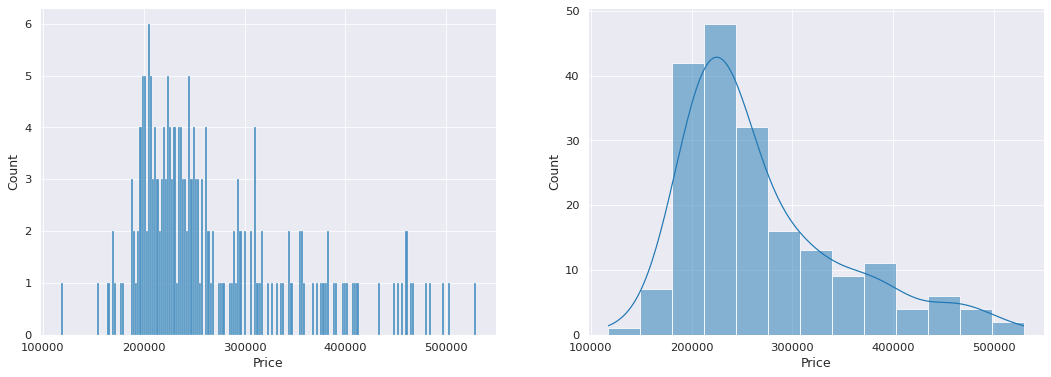

In [23]:
fig, ax = plt.subplots(1,2, figsize = (18, 6))
sns.histplot(data = df, x = 'Price', bins = 195, ax = ax[0]);
sns.histplot(data = df, x = 'Price', kde = True, ax = ax[1]);

* Task 5: Create a scatter plot showing the relationship between Price and Area. Use the data on all properties, no matter if sold or not. Interpret the results.

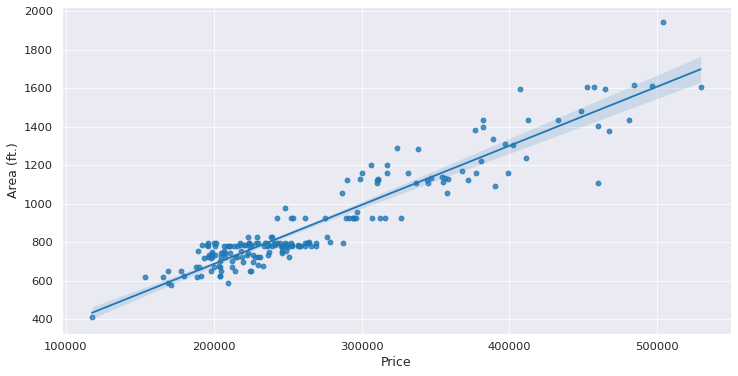

In [24]:
plt.figure(figsize= (12,6))
sns.regplot(data = df, x = 'Price', y = 'Area (ft.)');

In [17]:
'''É possível verificar uma forte correlação entre a aŕea do imóvel e o seu respectivo preço. Confirmando essa relação com o método de correlação de spearman abaixo.'''
df[['Price', 'Area (ft.)']].corr()

,Price,Area (ft.)
Price,1.000000,0.941203
Area (ft.),0.941203,1.000000


* Task 6: Create a frequency distribution table, where you list all the countries from which the company has buyers (country vs number of buyers). Count the absolute frequency, the relative frequency and the cumulative frequency. 

* Task 7: Create a Pareto diagram representing the data.

In [5]:
# Frequência absoluta
freq = pd.DataFrame(df['Country'].value_counts().sort_values(ascending= False))
freq.columns = ['Frequency']
freq

,Frequency
USA,177
Canada,7
Russia,4
UK,2
Belgium,2
Denmark,1
Germany,1
Mexico,1


In [25]:
# Frequência Relativa e Cumulativa
freq['Relative_freq(%)'] = freq['Frequency'].apply(lambda x: (x/freq['Frequency'].sum()) * 100)
freq['Cumulative_freq(%)'] = freq['Relative_freq(%)'].cumsum()
freq

,Frequency,Relative_freq(%),Cumulative_freq(%)
USA,177,90.769231,90.769231
Canada,7,3.589744,94.358974
Russia,4,2.051282,96.410256
UK,2,1.025641,97.435897
Belgium,2,1.025641,98.461538
Denmark,1,0.512821,98.974359
Germany,1,0.512821,99.487179
Mexico,1,0.512821,100.000000


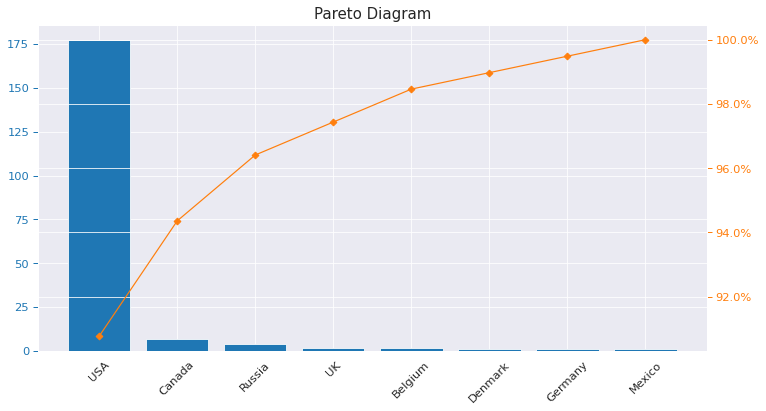

In [13]:
# Diagrama de pareto
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize = (12,6))
ax.bar(freq.index, freq['Frequency'], color = 'C0')
ax2 = ax.twinx()
ax2.plot(freq.index, freq['Cumulative_freq(%)'], color= 'C1', marker= 'D')
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.set_title('Pareto Diagram', fontsize=15)
ax.tick_params(axis="y", colors="C0")
ax.tick_params(axis="x", rotation = 45)
ax2.tick_params(axis="y", colors="C1")
plt.show()

* Task 8: Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not.

In [14]:
import scipy.stats

mean   = df['Price'].mean()
median = df['Price'].median()
mode   = scipy.stats.mode(df['Price'])
std    = df['Price'].std()
var    = np.var(df['Price'])
skew   = scipy.stats.skew(df['Price'])

print(f'Mean: {mean:.4f}.')
print(f'Median: {median:.4f}.')
print(f'Mode: {mode}.')
print(f'Std: {std:.4f}.')
print(f'Var: {var:.4f}.')
print(f'Skewness: {skew:.4f}.')

Mean: 269434.5610.
Median: 243052.5904.
Mode: ModeResult(mode=array([460001.256]), count=array([2])).
Std: 80129.0942.
Var: 6387745214.2935.
Skewness: 1.1950.


* Task 10: Calculate the covariance and correlation coefficient between Price and Area, no matter if the property is sold or not. Is the result in line with the scatter plot?

In [81]:
# Spearman correlation
df[['Price', 'Area (ft.)']].corr()

,Price,Area (ft.)
Price,1.000000,0.941203
Area (ft.),0.941203,1.000000


In [86]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

covariance(df['Price'], df['Area (ft.)'])

19720961.667512327

* O resultado do coeficiente de correalção coincide com a correlação observada no gráfico de dispersão (scatter plot), onde quanto maior a área do imóvel maior o preço do mesmo.